<a href="https://colab.research.google.com/github/wonkkim/wonkkim/blob/main/220726_StartDist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=3yk9sBja7YI
# https://github.com/stardist/stardist
!pip install stardist
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 7.7 MB/s 
     |████████████████████████████████| 69 kB 4.5 MB/s 
     |████████████████████████████████| 2.9 MB 37.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [13]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from google.colab import files
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prints a list of available models
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [ ]:
# Example 1. Nuclei segmenetation in Fluorescence image

In [4]:
# Define a pretrained model to segment nuclei in flourescence image 
# (download from pretrained)
model = StarDist2D.from_pretrained('2D_paper_dsb2018')
model

Found model '2D_paper_dsb2018' for 'StarDist2D'.
5242880/5231396 [==============================] - 0s 0us/step
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


StarDist2D(2D_paper_dsb2018): YXC → YXC
├─ Directory: None
└─ Config2D(axes='YXC', backbone='unet', grid=(1, 1), n_channel_in=1, n_channel_out=33, n_classes=None, n_dim=2, n_rays=32, net_conv_after_unet=128, net_input_shape=[None, None, 1], net_mask_shape=(None, None, 1), train_background_reg=0.0001, train_batch_size=4, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_class_weights=(1, 1), train_completion_crop=32, train_dist_loss='mae', train_epochs=100, train_foreground_only=0.9, train_learning_rate=0.0003, train_loss_weights=(1, 0.2), train_n_val_patches=None, train_patch_size=(256, 256), train_reduce_lr={'factor': 0.5, 'patience': 10}, train_sample_cache=True, train_shape_completion=False, train_steps_per_epoch=400, train_tensorboard=True, unet_activation='relu', unet_batch_norm=False, unet_dropout=0.0, unet_kernel_size=[3, 3], unet_last_activation='relu', unet_n_conv_per_depth=2, unet_n_depth=3, unet_n_filt

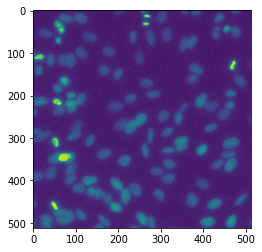

In [5]:
img = test_image_nuclei_2d()
plt.imshow(img)

In [6]:
labels, _ = model.predict_instances(normalize(img))

NameError: ignored

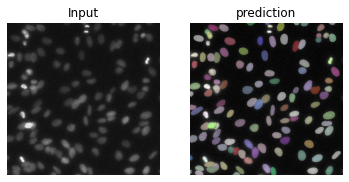

In [7]:
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Input')
plt.subplot(122); plt.imshow(render_label(labels, img=img)); plt.axis('off'); plt.title('prediction')
plt.savefig('flo2.png', dpi=1000)
files.download('flo2.png')

In [11]:
!ls

flo2.png  sample_data


/content/drive/MyDrive/colab/stardist/pore/J-0711-rehydrated-10001_a_Original.jpg
(1028, 1028)


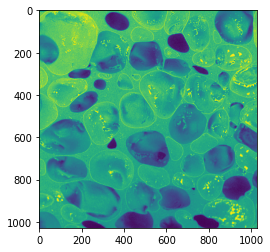

In [21]:
path = '/content/drive/MyDrive/colab/stardist/pore/'
inputfile = 'J-0711-rehydrated-10001_a_Original.jpg'
sem = cv2.imread(f'{path}{inputfile}}', cv2.IMREAD_GRAYSCALE)
assert sem is not None, "failed to open an input image"
h, w = sem.shape
sem = sem[0:w, 0:w]
sem = cv2.resize(sem, (1028, 1028))
print(sem.shape)
plt.imshow(sem)

In [17]:
labels_sem, _ = model.predict_instances(normalize(sem))

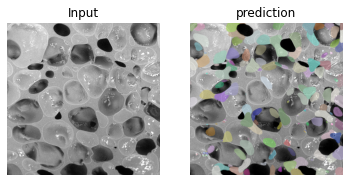

In [22]:
plt.subplot(121); plt.imshow(sem, cmap='gray'); plt.axis('off'); plt.title('Input')
plt.subplot(122); plt.imshow(render_label(labels_sem, img=sem)); plt.axis('off'); plt.title('prediction')
plt.savefig(f'{path}a4.png', dpi=1000)
#files.download('a4.png')

In [ ]:
# Example 2 Segmenting custom florescence image segmentation using a pretrained model

In [ ]:
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois

In [23]:
print(f'{path}a4.png')

/content/drive/MyDrive/colab/stardist/pore/a4.png


In [19]:
!ls

a4.png	drive  flo2.png  sample_data
